In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
cityDataDF = pd.read_csv(city_data_to_load)
rideDataDF = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
pyberDataDF = pd.merge(cityDataDF, rideDataDF, how="outer", on="city")

pyberDataDF.to_csv("export.csv")
# Display the data table for preview
pyberDataDF.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [2]:
#Average Fare per city
pyberDataDF_gby_city = pyberDataDF.groupby(by='city')
averageFarePerCity = pyberDataDF_gby_city['fare'].mean()

In [3]:
#Total no. of rides per city
totalRidesPerCity = pyberDataDF_gby_city['ride_id'].count()
totalRidesPerCity.head()

city
Amandaburgh      18
Barajasview      22
Barronchester    16
Bethanyland      18
Bradshawfurt     10
Name: ride_id, dtype: int64

In [4]:
#Total no. of drivers per city
totalDriversPerCity = pyberDataDF_gby_city['driver_count'].mean()
totalDriversPerCity.head()

city
Amandaburgh      12
Barajasview      26
Barronchester    11
Bethanyland      22
Bradshawfurt      7
Name: driver_count, dtype: int64

In [5]:
#Create a Series of city
cities = pyberDataDF_gby_city['type'].unique()

cityList = []
for city in cities:
    cityList.append(city[0])

In [6]:
#Types of cities
cityTypes = sorted(pyberDataDF['type'].unique())

print("Ensued are the City Types:")
for cityType in cityTypes:
    print(cityType)

Ensued are the City Types:
Rural
Suburban
Urban


## Bubble Plot of Ride Sharing Data

In [7]:
# Obtain the x and y coordinates for each of the three city types
#The 3 city types are Urban, Suburban and Rural. 
#Each city is marked with Average Fare, Total no. of drivers and Total no. of rides.
#Develop a City DataFrame that displays all these information

city_dict = {
    "Average Fare":averageFarePerCity,
    "Number of drivers":totalDriversPerCity,
    "Number of rides":totalRidesPerCity,
    "City Type":cityList
}
city_df = pd.DataFrame(city_dict)
city_df.head(10)

,Average Fare,Number of drivers,Number of rides,City Type
city,,,,
Amandaburgh,24.641667,12,18,Urban
Barajasview,25.332273,26,22,Urban
Barronchester,36.422500,11,16,Suburban
Bethanyland,32.956111,22,18,Suburban
Bradshawfurt,40.064000,7,10,Rural
Brandonfort,35.437368,10,19,Suburban
Carriemouth,28.314444,52,27,Urban
Christopherfurt,24.501852,41,27,Urban
Colemanland,30.894545,23,22,Suburban


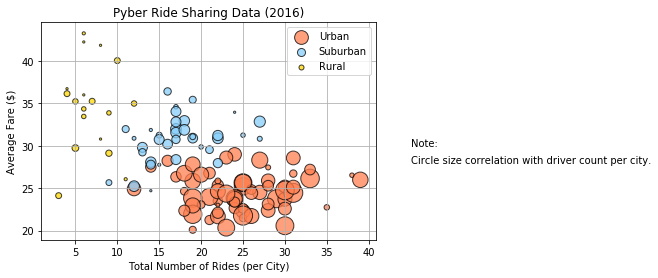

In [8]:
# Build the scatter plots for each city types
# The plot would be on Average Fare against the Number of rides.
# y - axis : Average Fare
# x - axis : Total number of Rides(Per city)

def constructScatterPlot(cityType, faceColorType):
    '''
        Collect the data for the City types and construct the Scatter Plots
    '''
    cityTypeDF = city_df.loc[city_df['City Type'] == cityType]
    plt.scatter(x=cityTypeDF['Number of rides'], y=cityTypeDF['Average Fare'], s=cityTypeDF['Number of drivers']*5, 
            edgecolors='black', label=cityType, facecolors = faceColorType, alpha = 0.75, linewidth=1.0)

# Construct the Scatter Plots for the City Types
constructScatterPlot('Urban', 'Coral')
constructScatterPlot('Suburban', 'LightSkyBlue')
constructScatterPlot('Rural', 'Gold')

# Incorporate the other graph properties - Grid, Title, X and Y Label
plt.grid()
plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel('Total Number of Rides (per City)')
plt.ylabel('Average Fare ($)')
    
# Create a legend
plt.legend(loc = "best")
    
# Incorporate a text label regarding circle size
plt.text(45, 30, 'Note:')
plt.text(45, 28, 'Circle size correlation with driver count per city.', fontsize=10)

# Save Figure
plt.savefig("pyber_ride_sharing_data.png")
plt.show()

## Total Fares by City Type

In [9]:
#Calculate Fare Percents
#To calculate %Fare, Total Fare per City Type needs to be computed.
totalFareByCityType = pyberDataDF.groupby('type')['fare'].sum()
print(f"Total Fare for each City Type: {totalFareByCityType}")


Total Fare for each City Type: type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64


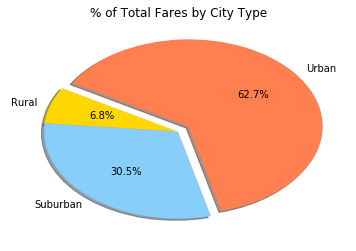

In [10]:
#Construct a Pie Chart for the Total Fares by City Type
pieColors = ['Gold','LightSkyBlue','Coral']
explodeTuple = (0, 0, 0.1)
#Build Pie Chart
plt.pie(x=totalFareByCityType, explode=explodeTuple, labels = cityTypes, colors=pieColors, autopct="%1.1f%%", 
        shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")

#Save Figure
plt.savefig("Total Fares by City Type.png")

#Save Figure
plt.show()


## Total Rides by City Type

In [11]:
# Calculate Ride Percents
totalRidesByCityType = (pyberDataDF.groupby('type')['ride_id']).count()
print(f"Total rides by each City Type: {totalRidesByCityType}")

Total rides by each City Type: type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64


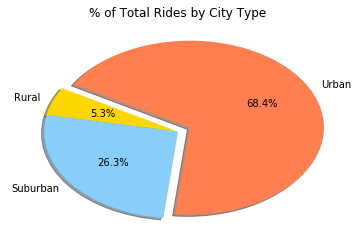

In [12]:
# Build Pie Chart
plt.pie(x=totalRidesByCityType, explode=explodeTuple, labels=cityTypes, colors=pieColors, autopct="%1.1f%%", 
        shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")
# Save Figure
plt.savefig("Total Rides by City Type.png")

# Show Figure
plt.show()

## Total Drivers by City Type

In [13]:
# Calculate Driver Percents
# The PyberData DataFrame contains multiple records of the same number of drivers against the same city
# and the same type.
# So the DataFrame needs to be grouped by the Type and then the City to ascertain the unique number of drivers
# aagainst the same city and the same type.
totalDriversByCity = pyberDataDF.groupby(['type','city'])['driver_count'].mean()

#Create a DataFrame of the Series and Group by Type to compute the total number of drivers against each type.
totalDriversByCityDF = pd.DataFrame(totalDriversByCity)
totalDriversByType = totalDriversByCityDF.groupby('type').sum()

print(f"Total drivers by each City Type: {totalDriversByType}")

Total drivers by each City Type:           driver_count
type                  
Rural               78
Suburban           490
Urban             2405


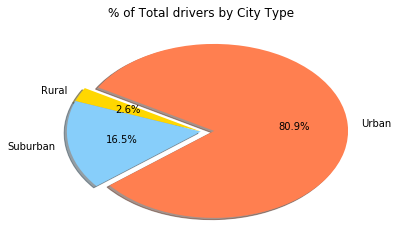

In [14]:
# Build Pie Chart
plt.pie(x=totalDriversByType, explode=explodeTuple, labels=cityTypes, colors=pieColors, autopct="%1.1f%%", 
        shadow=True, startangle=150)
plt.title("% of Total drivers by City Type")

# Save Figure
plt.savefig("Total drivers by City Type.png")

# Show Figure
plt.show()